In [2]:
import sys
import os
sys.path.append(os.path.abspath('../scripts'))

# Get the current directory
current_dir = os.getcwd()
print(current_dir)

# Get the parent directory
parent_dir = os.path.dirname(current_dir)
#print(parent_dir)

# Insert the path to the parent directory
sys.path.insert(0, parent_dir)

from scripts.load_data import load_data_using_sqlalchemy
from scripts.UserEngagement_Analysis import TelecomUserEngagement


e:\10Academy\Tellco_DA\notebooks


In [3]:
# Define your SQL query
query = "SELECT * FROM xdr_data;"  # Replace with your actual table name

# Load data from PostgreSQL using SQLAlchemy
df = load_data_using_sqlalchemy(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")

Successfully loaded the data


In [4]:
# Initialize the class with the DataFrame
engagement_analysis = TelecomUserEngagement(df)
# Aggregate metrics
aggregated_metrics = engagement_analysis.aggregate_metrics()

In [6]:
# Display the top 10 customers based on their session frequency
top_customers_session_freq = engagement_analysis.top_customers('Session Frequency')  # Analyzes user engagement by session frequency

# Print the results showing the top 10 customers
print("Top 10 Customers by Session Frequency")  # Label for output
print(top_customers_session_freq)  # Output the top 10 customers based on session frequency


Top 10 Customers by Session Frequency
               Total Duration (s)  Session Frequency  Total Traffic (Bytes)
MSISDN/Number                                                              
3.362632e+10             8791.927                 18           7.971167e+09
3.361489e+10             9966.898                 17           8.846226e+09
3.362578e+10            18553.754                 17           8.499621e+09
3.365973e+10             4035.428                 16           7.705863e+09
3.367588e+10             4865.947                 15           7.891111e+09
3.376054e+10             9279.434                 15           8.514774e+09
3.366716e+10             8744.914                 13           5.618394e+09
3.360313e+10             6287.761                 12           4.976195e+09
3.360452e+10             5207.990                 12           5.487855e+09
3.362708e+10             4703.516                 12           5.754731e+09


In [7]:
# Display the top 10 customers by Total Duration (s)
top_customers_duration = engagement_analysis.top_customers('Total Duration (s)')  # Fetch the top 10 customers based on total session duration
print("Top 10 Customers by Total Duration")  # Print a header for the output
print(top_customers_duration)  # Display the results

Top 10 Customers by Total Duration
               Total Duration (s)  Session Frequency  Total Traffic (Bytes)
MSISDN/Number                                                              
3.362578e+10            18553.754                 17           8.499621e+09
3.361489e+10             9966.898                 17           8.846226e+09
3.376054e+10             9279.434                 15           8.514774e+09
3.362632e+10             8791.927                 18           7.971167e+09
3.366716e+10             8744.914                 13           5.618394e+09
3.366284e+10             6614.270                  9           4.000098e+09
3.366469e+10             6288.730                  9           5.682007e+09
3.360313e+10             6287.761                 12           4.976195e+09
3.366746e+10             5649.882                  6           2.600522e+09
3.376041e+10             5321.667                 12           7.132371e+09


In [8]:
# Display the top 10 customers by Total Traffic (Bytes)
top_customers_traffic = engagement_analysis.top_customers('Total Traffic (Bytes)')  # Fetch the top 10 customers based on total traffic consumption
print("Top 10 Customers by Total Traffic")  # Print a header for the output
print(top_customers_traffic)  # Display the results

Top 10 Customers by Total Traffic
               Total Duration (s)  Session Frequency  Total Traffic (Bytes)
MSISDN/Number                                                              
3.361489e+10             9966.898                 17           8.846226e+09
3.376054e+10             9279.434                 15           8.514774e+09
3.362578e+10            18553.754                 17           8.499621e+09
3.362632e+10             8791.927                 18           7.971167e+09
3.367588e+10             4865.947                 15           7.891111e+09
3.365973e+10             4035.428                 16           7.705863e+09
3.366646e+10             4536.757                 11           7.308501e+09
3.376041e+10             5321.667                 12           7.132371e+09
3.366471e+10             2927.785                 11           6.872018e+09
3.369879e+10             5169.128                 11           6.540899e+09


This report analyzes telecom user behavior, focusing on traffic, session duration, and frequency. Key insights include:

Top Traffic Users: Heavy data consumers, likely engaged in streaming and large downloads.
Top Duration Users: Long network sessions, indicating strong engagement.
Top Frequency Users: Frequent network users, suggesting regular service interaction.
Recommendations include:

Prioritizing high-engagement users for network optimization.
Offering personalized data plans and promotions.
Using customer feedback and data monitoring for improved service and loyalty.
The analysis highlights the importance of user behavior in optimizing service quality and customer retention.

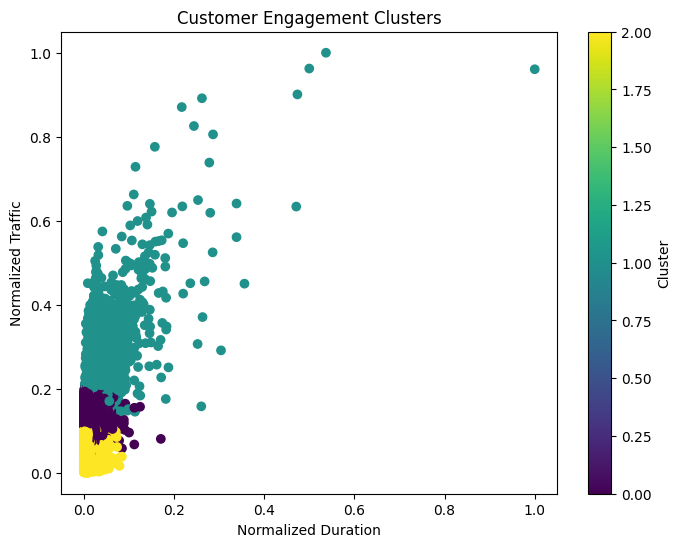

                    Total Duration (s)  Session Frequency  \
Engagement Cluster                                          
0                           215.100806           2.184791   
1                           572.159112           4.258194   
2                           107.473681           1.043550   

                    Total Traffic (Bytes)  
Engagement Cluster                         
0                            1.138979e+09  
1                            2.294204e+09  
2                            4.964976e+08  


In [9]:
# Normalize the metrics for clustering
engagement_analysis.normalize_metrics()

# Run K-Means clustering to group customers based on the normalized metrics
engagement_analysis.run_kmeans()

# Plot the resulting clusters to visualize customer segmentation
engagement_analysis.plot_clusters()

# Analyze the clusters to gain insights into customer behavior patterns
cluster_analysis = engagement_analysis.analyze_clusters()

# Print the results of the cluster analysis
print(cluster_analysis)

Interpretation:
1.	Cluster 0:
o	Duration: 215.1s, Frequency: 2.18 sessions, Traffic: 1.14 GB
o	Moderate traffic usage but lower engagement (shorter sessions and fewer frequency).
2.	Cluster 1:
o	Duration: 572.2s, Frequency: 4.26 sessions, Traffic: 2.29 GB
o	Moderate engagement with more frequent, longer sessions and higher traffic consumption, likely engaged in moderate data activities.
3.	Cluster 2:
o	Duration: 107.5s, Frequency: 1.04 sessions, Traffic: 496.5 MB
o	Low engagement, with minimal usage.
Insights
•	Cluster 0: Occasional users with moderate data consumption.
•	Cluster 1: Regular users with moderate data usage, ideal for targeted offers.
•	Cluster 2: Infrequent, low-data users.


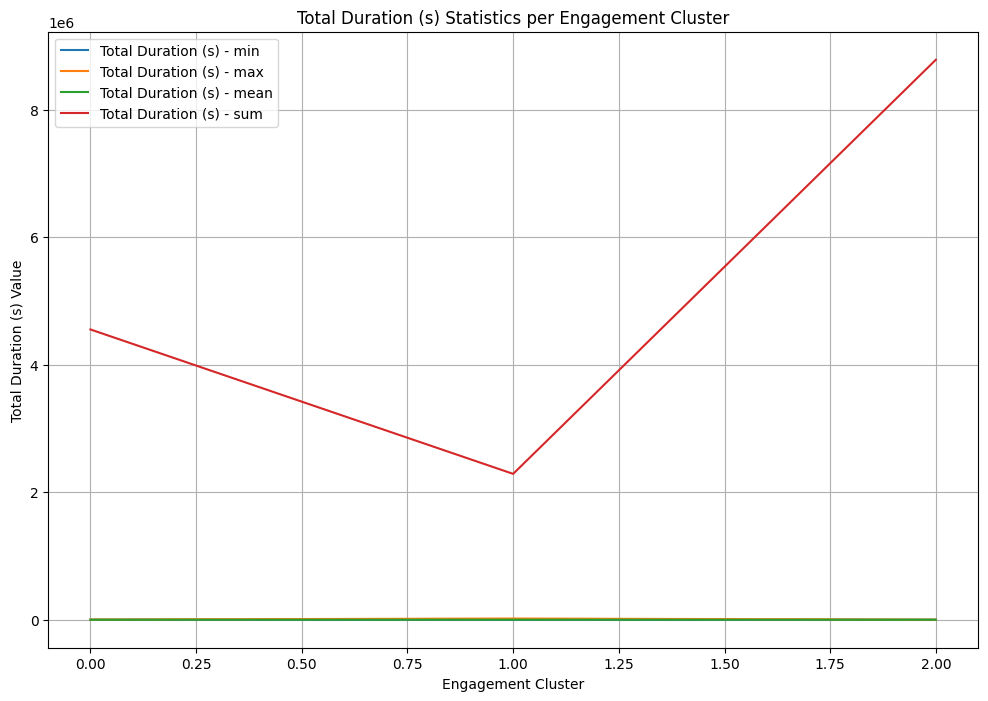

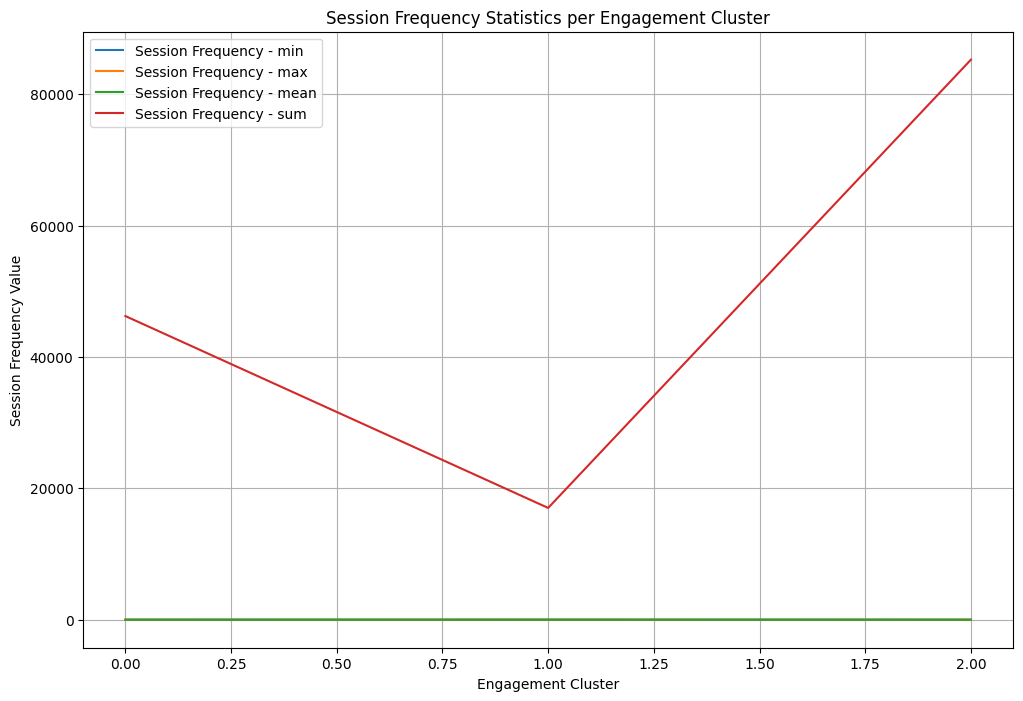

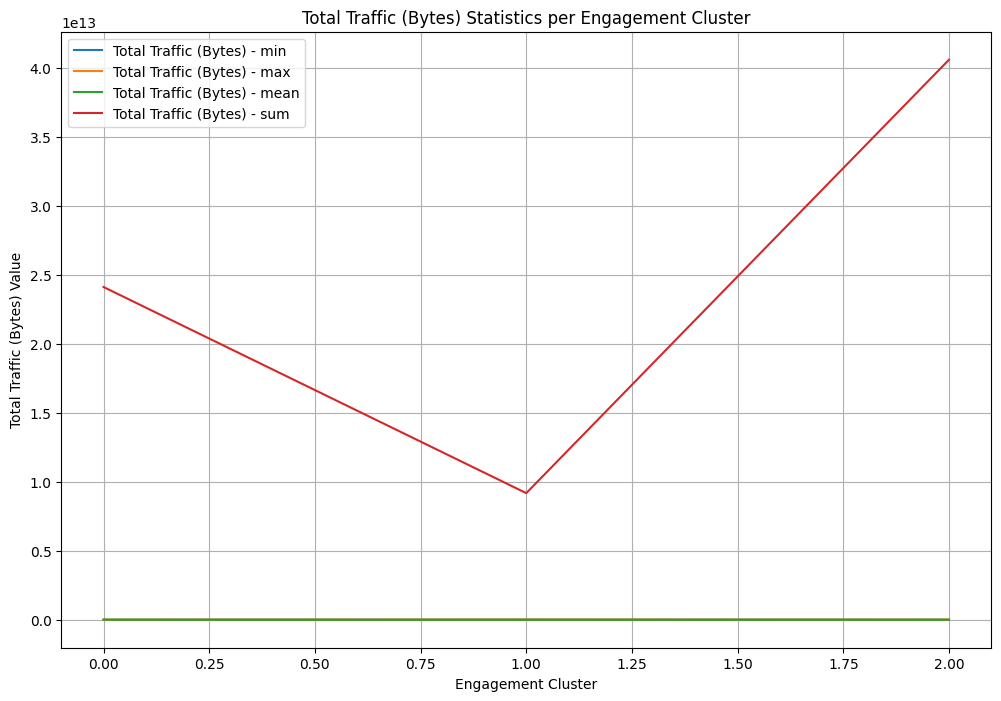

                   Total Duration (s)                                      \
                                  min        max        mean          sum   
Engagement Cluster                                                          
0                              18.235   3174.824  215.100806  4551317.959   
1                              49.323  18553.754  572.159112  2286919.971   
2                               7.142   1573.420  107.473681  8780599.726   

                   Session Frequency                       \
                                 min max      mean    sum   
Engagement Cluster                                          
0                                  1   4  2.184791  46228   
1                                  3  18  4.258194  17020   
2                                  0   2  1.043550  85258   

                   Total Traffic (Bytes)                              \
                                     min           max          mean   
Engagement Cluster        

In [10]:
# Compute and plot cluster statistics
cluster_stats = engagement_analysis.compute_cluster_statistics()
engagement_analysis.plot_cluster_statistics(cluster_stats)

# Display the statistics for inspection
print(cluster_stats)

Cluster Summary:

Cluster 0: Moderate engagement with balanced session frequency and data traffic (24.10 TB). Represents users with moderate activity and moderate data consumption.
Cluster 1: Highly engaged users with long sessions and high traffic (9.17 TB). Represents the most active users.
Cluster 2: Low engagement but high traffic per session, leading to the highest total traffic (40.56 TB). Represents infrequent users with heavy data use.
In essence, Cluster 1 is the most engaged, Cluster 0 is moderate, and Cluster 2 has high data usage despite low engagement.

In [11]:
# Aggregate traffic per application and identify top users
application_traffic = engagement_analysis.aggregate_traffic_per_application()
top_users = engagement_analysis.top_users_per_application(top_n=10)

# Display the top users for inspection
print(top_users)

        MSISDN/Number  Total Traffic Social Media (Bytes)   Application  \
13526    3.362632e+10                          42743837.0  Social Media   
92923    3.376054e+10                          39297646.0  Social Media   
37052    3.365973e+10                          34900444.0  Social Media   
6437     3.361489e+10                          27749744.0  Social Media   
13180    3.362578e+10                          26564121.0  Social Media   
...               ...                                 ...           ...   
678188   3.365973e+10                                 NaN         Other   
655072   3.362695e+10                                 NaN         Other   
655130   3.362708e+10                                 NaN         Other   
735790   3.376127e+10                                 NaN         Other   
656800   3.363004e+10                                 NaN         Other   

        Total Traffic Google (Bytes)  Total Traffic Email (Bytes)  \
13526                         

Key Points:
High Traffic Users: Users with high traffic are predominantly in the 'Other' category, while Social Media also has significant traffic data for many users.
Missing Values: There are missing values (NaN) for traffic data in several columns, particularly for users who did not record traffic for those applications.
Application Coverage: Not all applications have traffic data for every user, highlighting possible gaps or incomplete data.

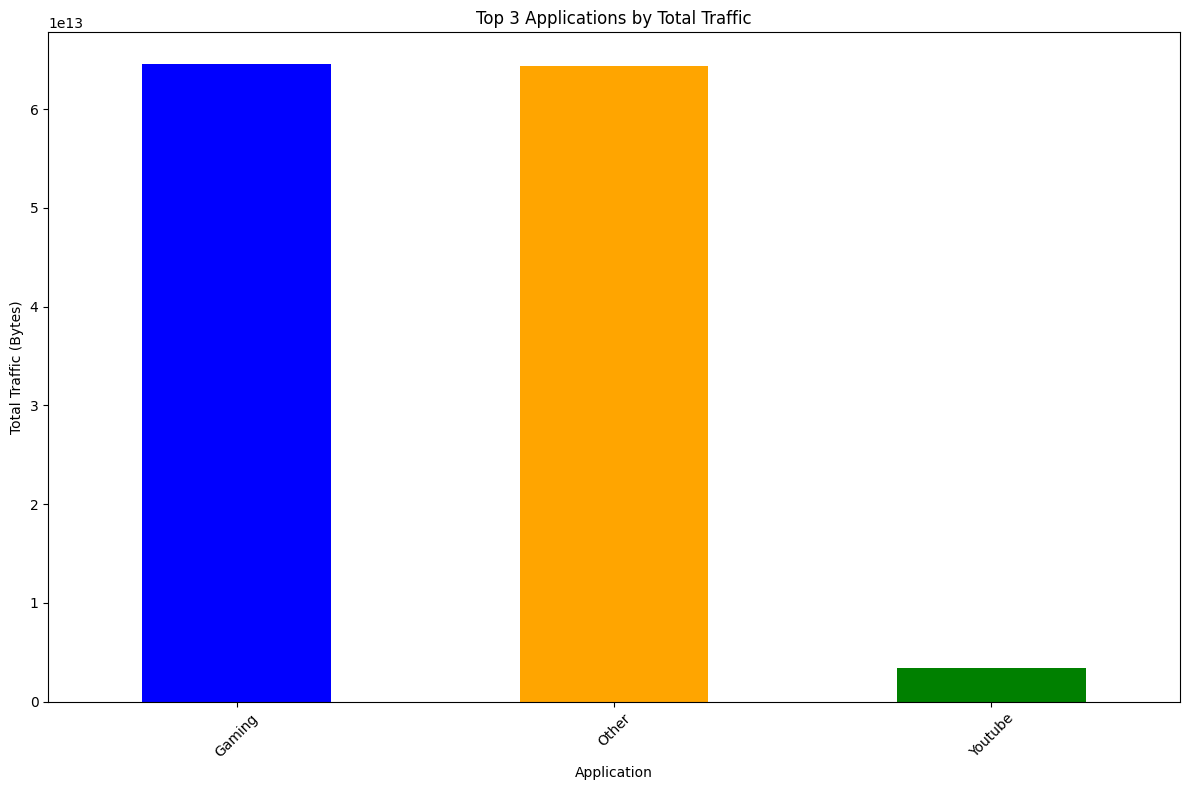

In [12]:
# Plot the top applications based on user engagement
engagement_analysis.plot_top_applications()

## Summary and Recommendations
This report analyzes telecom user behavior by segmenting users into three engagement clusters based on handset usage and network activity.

## Key Findings:
Cluster 0 (Low Engagement): Moderate traffic, occasional sessions (Duration: 215.1s, Sessions: 2.18, Traffic: 1.14 GB).
Cluster 1 (Moderate Engagement): Frequent, longer sessions, higher traffic (Duration: 572.2s, Sessions: 4.26, Traffic: 2.29 GB).
Cluster 2 (High Engagement): Low frequency, short sessions, but high total data consumption (Duration: 107.5s, Sessions: 1.04, Traffic: 496.5 MB).
## Insights:
Cluster 1 has the highest engagement and traffic.
Cluster 0 generates the most total traffic despite lower engagement.
Cluster 2 has fewer sessions but substantial data use.
## Recommendations:
Cluster 1: Offer premium plans to further engage.
Cluster 0: Optimize network for occasional users.
Cluster 2: Boost engagement with targeted strategies.
Top Social Media Users: Focus marketing on high social media traffic users.
"Other" Traffic: Investigate further to identify new engagement opportunities.
Conclusion:
Targeted strategies based on user behavior can optimize resources, improve service offerings, and increase customer retention.